# Algoritmo de comparación: Greedy

Para efectuar la comparativa de resultados entre los distintos algoritmos de búsqueda, se debe implementar como algoritmo básico, un Greedy, es decir, siguiendo la heurística del  vecino  más  cercano:  parte  de  una  ciudad  concreta, en  nuestro  caso  la  número  1,  la elimina del conjunto de nodos, y escoge como su seguidora en el circuito aquella que se encuentre  situada  a  menor  distancia.  Este  proceso  se  repite  iterativamente,  empleando como ciudades alcanzables sólo el conjunto de las restantes, hasta que dicho conjunto este vacío, para finalmente contabilizar el retorno a la ciudad de origen (en esta práctica, con todos  los  algoritmos  consideraremos  el  retorno  al  origen,  lo  cual  hace  la  solución independiente de la ciudad elegida inicialmente).

---
## Librerías
- math: necesaria para funciones matemáticas básicas.
- matplotlib: necesaria para la representación de la solución.
- sys: necesaria para la obtención del entero mas grande.

In [1]:
import math 
from matplotlib import pyplot as plt
import sys

---
## Funciones auxiliares
- cargar_fichero(nombre_fichero): devuelve un array con las ciudades almacenadas en el fichero. [ [ ciudad, posición x , posición y ] [...] ... ]
- calcular_distancia_euclidea(node_1,node_2): devuelve en la distancia entre las dos ciudades.
- dibujar_flecha(A, B): dibuja una flecha entre el punto A y B apuntando a B. 
- representacion(camino, nombre, distancia): representa las ciudades y el camino calculado.

In [2]:
def cargar_fichero(nombre_fichero):
    
    fichero = open( "../Dataset/" + nombre_fichero + ".tsp", 'r')
    
    for i in range(3):
        fichero.readline()
        
    numero_de_ciudades = fichero.readline().strip().split()[1]
    
    for i in range(2):
        fichero.readline()
        
    ciudades = []
    for i in range(0, int(numero_de_ciudades)):
        ciudad,x,y = fichero.readline().strip().split()[:]
        ciudades.append([int(ciudad),float(x),float(y)])  
        
    fichero.close()
    
    return ciudades

In [3]:
def calcular_distancia_euclidea(ciudad_1,ciudad_2):
    
    x1,y1 = ciudad_1[1 :]
    x2,y2 = ciudad_2[1 :]
    
    xd = x1 - x2;
    yd = y1 - y2;
    
    return round(math.sqrt( xd*xd + yd*yd ))

In [4]:
def dibujar_flecha(A, B):
    plt.arrow(A[0], A[1], B[0] - A[0], B[1] - A[1],
              head_width=1.3, length_includes_head=True)

In [5]:
def representacion(camino, nombre, distancia):
    
    plt.figure(figsize=(10,10))
    
    for i in range(len(camino)):
        if(i == 0):
            plt.plot(camino[i][1], camino[i][2] , "o", color="green")
        else:
            plt.plot(camino[i][1], camino[i][2] , "*", color="red")
        
        if(i<len(camino)-1):
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[i+1][1], camino[i+1][2]])
        else:
            dibujar_flecha([camino[i][1], camino[i][2]],[camino[0][1], camino[0][2]])
    
    plt.title(nombre + " : " + str(distancia))

---
## Función de evaluación
Esta función genera el coste total de la solución pasara por parámetro. Para ello recorre todas las ciudades de la solución sumando el coste entre ellas. 

In [6]:
def funcion_de_evaluacion(solucion):
    coste = 0
    for indice in range(len(solucion)-1):
        coste += calcular_distancia_euclidea(solucion[indice],solucion[indice+1])
    coste += calcular_distancia_euclidea(solucion[-1],solucion[0])
    return coste

---
## Algoritmo: Greedy

In [7]:
def greedy(ciudad_inicial,dataset):
    
    solucion = [dataset[ciudad_inicial-1]]
    ciudades_no_analizadas = dataset.copy()
    ciudades_no_analizadas.pop(ciudad_inicial-1)
    
    while(len(ciudades_no_analizadas) > 0):
        
        coste_actual = sys.maxsize
        ciudad_actual = -1;
        
        for ciudad_candidata in range(len(ciudades_no_analizadas)):
            
            coste_candidato = calcular_distancia_euclidea(solucion[-1],ciudades_no_analizadas[ciudad_candidata])
            
            if(coste_actual > coste_candidato):
                coste_actual = coste_candidato
                ciudad_actual = ciudad_candidata
                
        solucion.append(ciudades_no_analizadas[ciudad_actual])
        ciudades_no_analizadas.pop(ciudad_actual)
   
    return solucion

---
## Lectura de ficheros y ejecución del algoritmo

In [8]:
st70 = cargar_fichero("st70")
ch130 = cargar_fichero("ch130")
a280 = cargar_fichero("a280")
p654 = cargar_fichero("p654")
vm1084 = cargar_fichero("vm1084")
vm1748 = cargar_fichero("vm1748")

### st70

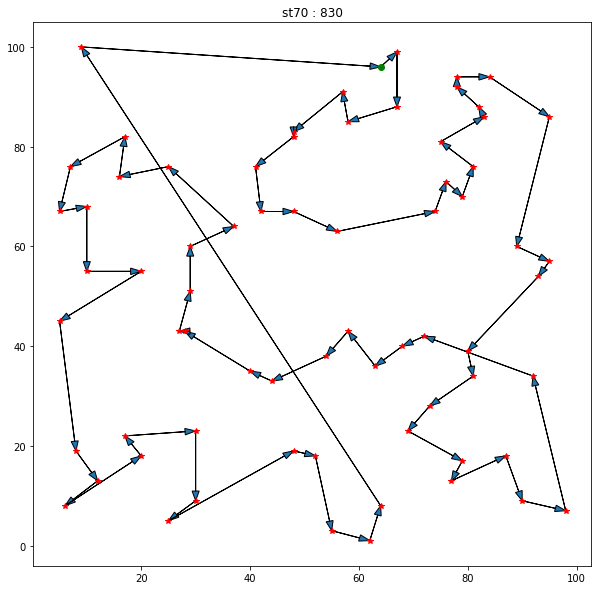

In [9]:
solucion_st70 = greedy(1,st70)
coste_solucion_st70 = funcion_de_evaluacion(solucion_st70)
representacion(solucion_st70, "st70", coste_solucion_st70)

### ch130


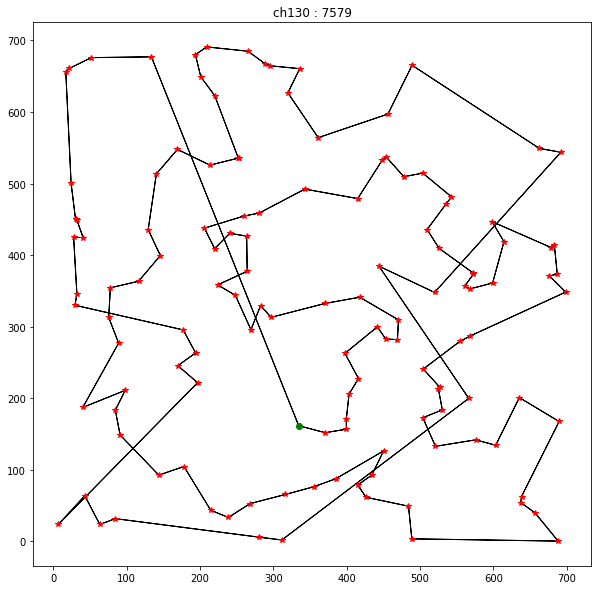

In [10]:
solucion_ch130 = greedy(1,ch130)
coste_solucion_ch130 = funcion_de_evaluacion(solucion_ch130)
representacion(solucion_ch130, "ch130", coste_solucion_ch130)

### a280

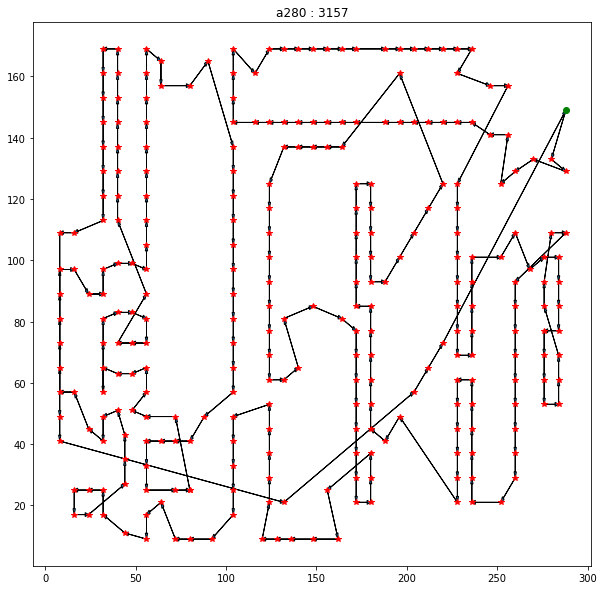

In [11]:
solucion_a280 = greedy(1,a280)
coste_solucion_a280 = funcion_de_evaluacion(solucion_a280)
representacion(solucion_a280, "a280", coste_solucion_a280)

### p654

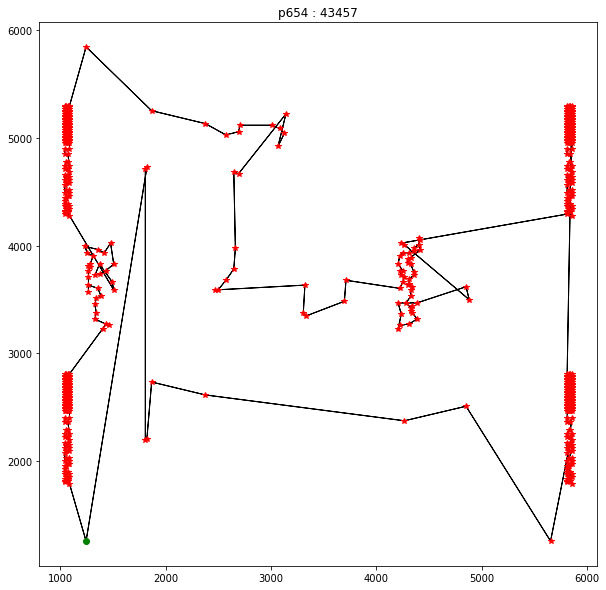

In [12]:
solucion_p654 = greedy(1,p654)
coste_solucion_p654 = funcion_de_evaluacion(solucion_p654)
representacion(solucion_p654, "p654", coste_solucion_p654)

### vm1084

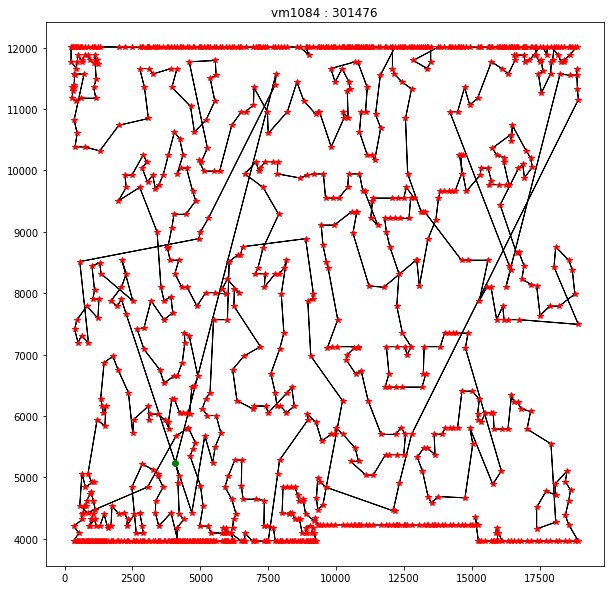

In [13]:
solucion_vm1084 = greedy(1,vm1084)
coste_solucion_vm1084 = funcion_de_evaluacion(solucion_vm1084)
representacion(solucion_vm1084, "vm1084", coste_solucion_vm1084)

### vm1748

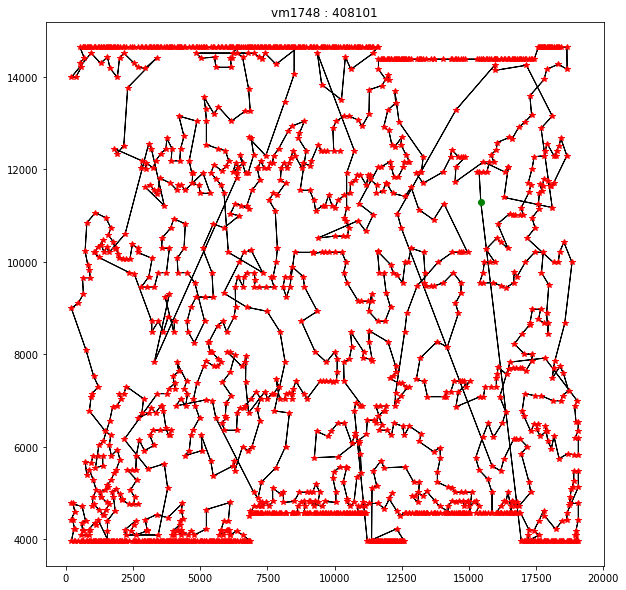

In [14]:
solucion_vm1748 = greedy(1,vm1748)
coste_solucion_vm1748 = funcion_de_evaluacion(solucion_vm1748)
representacion(solucion_vm1748, "vm1748", coste_solucion_vm1748)